In [1]:
import pickle
import math
import random
import numpy as np
import matplotlib.pyplot as plt

# Fig 4

In [7]:
T = 10
alpha = 0.5                       # Exponent
ENS_step = 1000                    # Ensemble
MC_step = 100                     # (Macro) Step

spin_config = ['NH', 'AR', 'SH']

In [8]:
import matplotlib as mpl

cmap = mpl.colormaps['plasma']
colors = cmap(np.linspace(0, 1, 8))

Text(0.5, 0.075, 'time (t)')

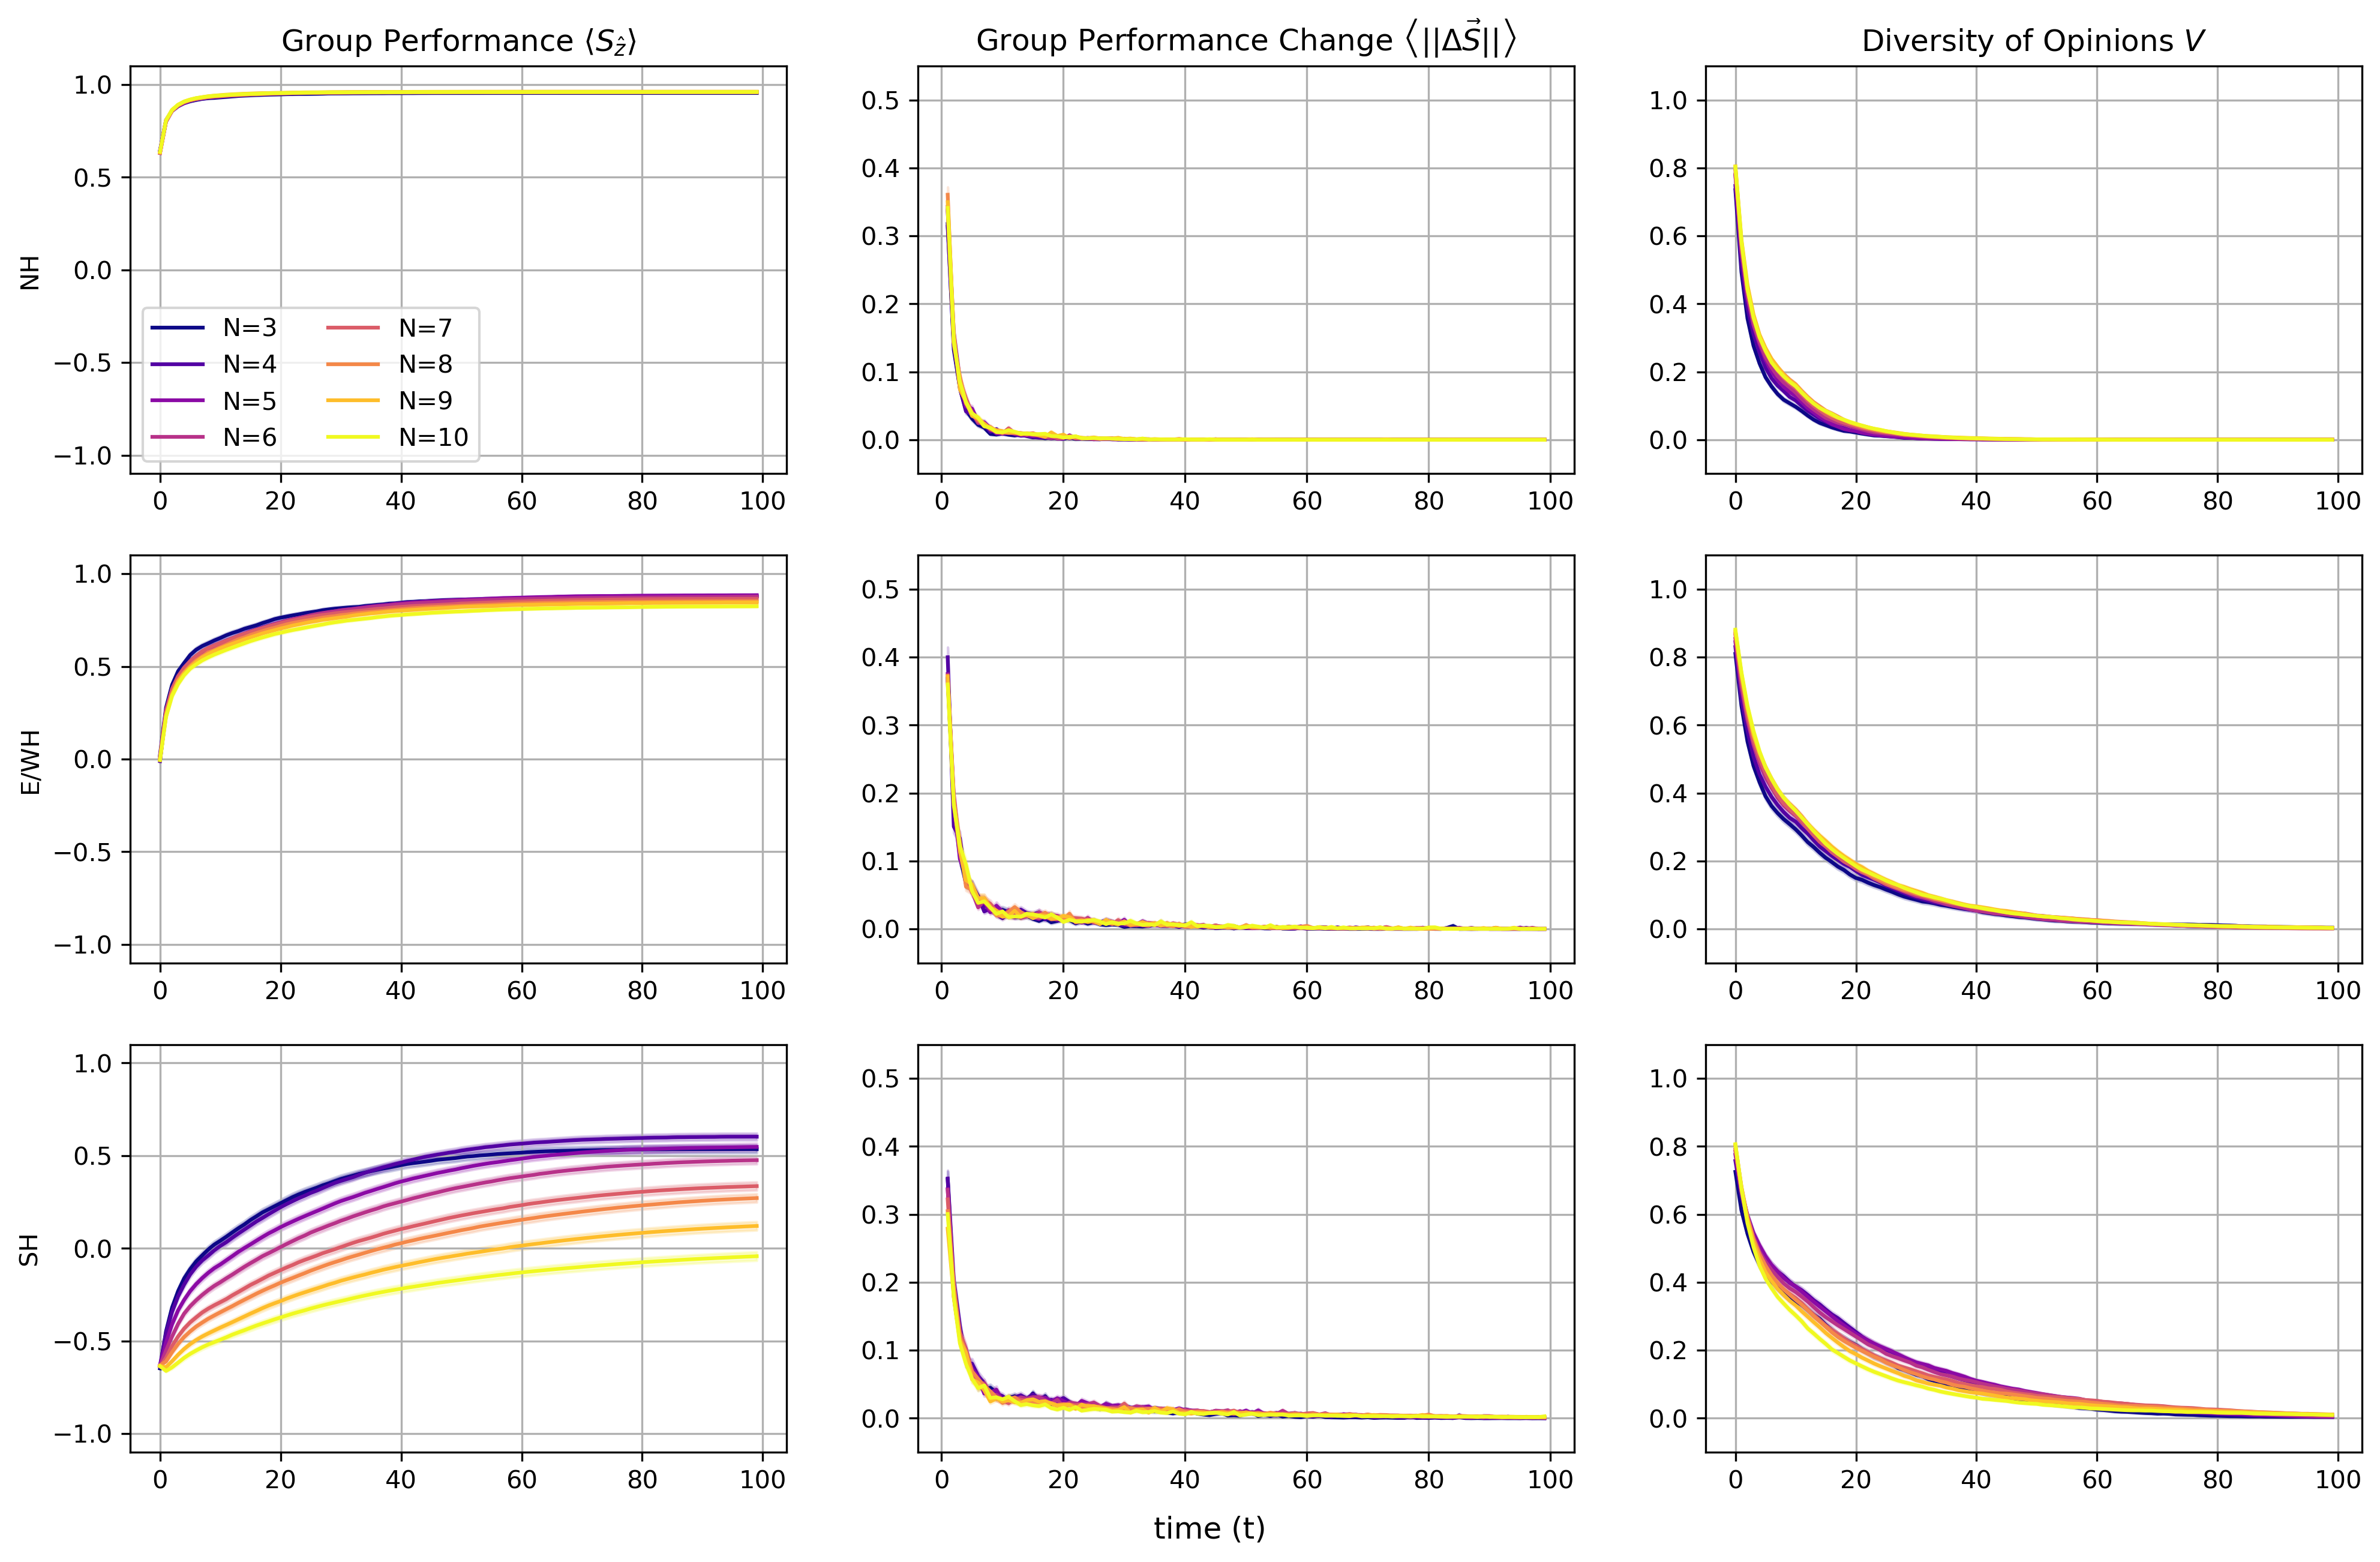

In [9]:
fig,axs = plt.subplots(3,3,figsize=(16,10), dpi=300)

t = np.arange(0, MC_step)

for i in range(3):
  axs[i, 0].set_ylim([-1.1,1.1])
  axs[i, 1].set_ylim([-0.05,0.55])
  axs[i, 2].set_ylim([-0.1,1.1])


config='NH'
S_array = []
V_array = []
del_S_array = []
for idx, N in enumerate([3,4,5,6,7,8,9,10]):
  with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    S_array.append(pickle.load(f))
  with open(f"Varray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    V_array.append(pickle.load(f))
  with open(f"DelS_array_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    del_S_array.append(pickle.load(f))

axs[0, 0].set_ylabel("NH")
axs[0, 0].set_title(r'Group Performance $\left\langle S_\hat{z} \right\rangle$')
for i, N in enumerate([3,4,5,6,7,8,9,10]):
  Savg = np.array([S_array[i][mc, :, :,2].mean(1).mean() for mc in range(MC_step)])
  Sstd = np.array([np.std(S_array[i][mc, :, :,2].mean(1))/(ENS_step**0.5) for mc in range(MC_step)])
  axs[0, 0].plot(t, Savg, '-', color=colors[i], label= f'N={N}')
  axs[0, 0].fill_between(t, Savg - Sstd, Savg + Sstd, color=colors[i], alpha = 0.2)
axs[0, 0].legend(ncol=2)
axs[0, 0].grid()

axs[0, 1].set_title(r"Group Performance Change $\left\langle || \Delta \vec{S} || \right\rangle$")
for i, N in enumerate([3,4,5,6,7,8,9,10]):
  delSavg = np.array([del_S_array[i][mc,:,0].mean() for mc in range(1,MC_step)])
  delSstd = np.array([np.std(del_S_array[i][mc,:,0])/(ENS_step**0.5) for mc in range(1,MC_step)])
  axs[0, 1].plot(t[1:], delSavg, '-', color=colors[i])
  axs[0, 1].fill_between(t[1:], delSavg - delSstd, delSavg + delSstd, color=colors[i], alpha = 0.2)
axs[0, 1].grid()

axs[0, 2].set_title(r'Diversity of Opinions $V$')
for i, N in enumerate([3,4,5,6,7,8,9,10]):
  Vavg = np.array([V_array[i][mc,:].mean() for mc in range(MC_step)])
  Vstd = np.array([np.std(V_array[i][mc,:])/(ENS_step**0.5) for mc in range(MC_step)])
  axs[0, 2].plot(t, Vavg, '-', color=colors[i])
  axs[0, 2].fill_between(t, Vavg - Vstd, Vavg + Vstd, color=colors[i], alpha = 0.2)
axs[0, 2].grid()


# N=5
config='EWH'
S_array = []
V_array = []
del_S_array = []
for idx, N in enumerate([3,4,5,6,7,8,9,10]):
  with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    S_array.append(pickle.load(f))
  with open(f"Varray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    V_array.append(pickle.load(f))
  with open(f"DelS_array_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    del_S_array.append(pickle.load(f))

axs[1, 0].set_ylabel("E/WH")
for i, N in enumerate([3,4,5,6,7,8,9,10]):
  Savg = np.array([S_array[i][mc, :, :,2].mean(1).mean() for mc in range(MC_step)])
  Sstd = np.array([np.std(S_array[i][mc, :, :,2].mean(1))/(ENS_step**0.5) for mc in range(MC_step)])
  axs[1, 0].plot(t, Savg, '-', color=colors[i])
  axs[1, 0].fill_between(t, Savg - Sstd, Savg + Sstd, color=colors[i], alpha = 0.2)
axs[1, 0].grid()

for i, N in enumerate([3,4,5,6,7,8,9,10]):
  delSavg = np.array([del_S_array[i][mc,:,0].mean() for mc in range(1,MC_step)])
  delSstd = np.array([np.std(del_S_array[i][mc,:,0])/(ENS_step**0.5) for mc in range(1,MC_step)])
  axs[1, 1].plot(t[1:], delSavg, '-', color=colors[i])
  axs[1, 1].fill_between(t[1:], delSavg - delSstd, delSavg + delSstd, color=colors[i], alpha = 0.2)
axs[1, 1].grid()

for i, N in enumerate([3,4,5,6,7,8,9,10]):
  Vavg = np.array([V_array[i][mc,:].mean() for mc in range(MC_step)])
  Vstd = np.array([np.std(V_array[i][mc,:])/(ENS_step**0.5) for mc in range(MC_step)])
  axs[1, 2].plot(t, Vavg, '-', color=colors[i])
  axs[1, 2].fill_between(t, Vavg - Vstd, Vavg + Vstd, color=colors[i], alpha = 0.2)
axs[1, 2].grid()


# N=10
config='SH'
S_array = []
V_array = []
del_S_array = []
for idx, N in enumerate([3,4,5,6,7,8,9,10]):
  with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    S_array.append(pickle.load(f))
  with open(f"Varray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    V_array.append(pickle.load(f))
  with open(f"DelS_array_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    del_S_array.append(pickle.load(f))

axs[2, 0].set_ylabel("SH")
for i, N in enumerate([3,4,5,6,7,8,9,10]):
  Savg = np.array([S_array[i][mc, :, :,2].mean(1).mean() for mc in range(MC_step)])
  Sstd = np.array([np.std(S_array[i][mc, :, :,2].mean(1))/(ENS_step**0.5) for mc in range(MC_step)])
  axs[2, 0].plot(t, Savg, '-', color=colors[i])
  axs[2, 0].fill_between(t, Savg - Sstd, Savg + Sstd, color=colors[i], alpha = 0.2)
axs[2, 0].grid()

for i, N in enumerate([3,4,5,6,7,8,9,10]):
  delSavg = np.array([del_S_array[i][mc,:,0].mean() for mc in range(1,MC_step)])
  delSstd = np.array([np.std(del_S_array[i][mc,:,0])/(ENS_step**0.5) for mc in range(1,MC_step)])
  axs[2, 1].plot(t[1:], delSavg, '-', color=colors[i])
  axs[2, 1].fill_between(t[1:], delSavg - delSstd, delSavg + delSstd, color=colors[i], alpha = 0.2)
axs[2, 1].grid()

for i, N in enumerate([3,4,5,6,7,8,9,10]):
  Vavg = np.array([V_array[i][mc,:].mean() for mc in range(MC_step)])
  Vstd = np.array([np.std(V_array[i][mc,:])/(ENS_step**0.5) for mc in range(MC_step)])
  axs[2, 2].plot(t, Vavg, '-', color=colors[i])
  axs[2, 2].fill_between(t, Vavg - Vstd, Vavg + Vstd, color=colors[i], alpha = 0.2)
axs[2, 2].grid()

fig.suptitle("time (t)", y = 0.075)

# Fig 4-1

In [4]:
N = 5                             # No. of agents
alpha = 0.5   
T = 10
ENS_step = 1000                    # Ensemble
MC_step = 100                     # (Macro) Step

In [5]:
NH_avg = []
NH_std = []
config = 'NH'
for N in [3,4,5,6,7,8,9,10]:
  with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    lst = pickle.load(f)
  NH_avg.append(lst[-1, :, :,2].mean(1).mean())
  NH_std.append(np.std(lst[-1, :, :,2].mean(1))/(ENS_step**0.5))
    
AR_avg = []
AR_std = []
config = 'EWH'
for N in [3,4,5,6,7,8,9,10]:
  with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    lst = pickle.load(f)
  AR_avg.append(lst[-1, :, :,2].mean(1).mean())
  AR_std.append(np.std(lst[-1, :, :,2].mean(1))/(ENS_step**0.5))

SH_avg = []
SH_std = []
config = 'SH'
for N in [3,4,5,6,7,8,9,10]:
  with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    lst = pickle.load(f)
  SH_avg.append(lst[-1, :, :,2].mean(1).mean())
  SH_std.append(np.std(lst[-1, :, :,2].mean(1))/(ENS_step**0.5))

In [6]:
NH_avg = np.array(NH_avg)
NH_std = np.array(NH_std)

AR_avg = np.array(AR_avg)
AR_std = np.array(AR_std)

SH_avg = np.array(SH_avg)
SH_std = np.array(SH_std)

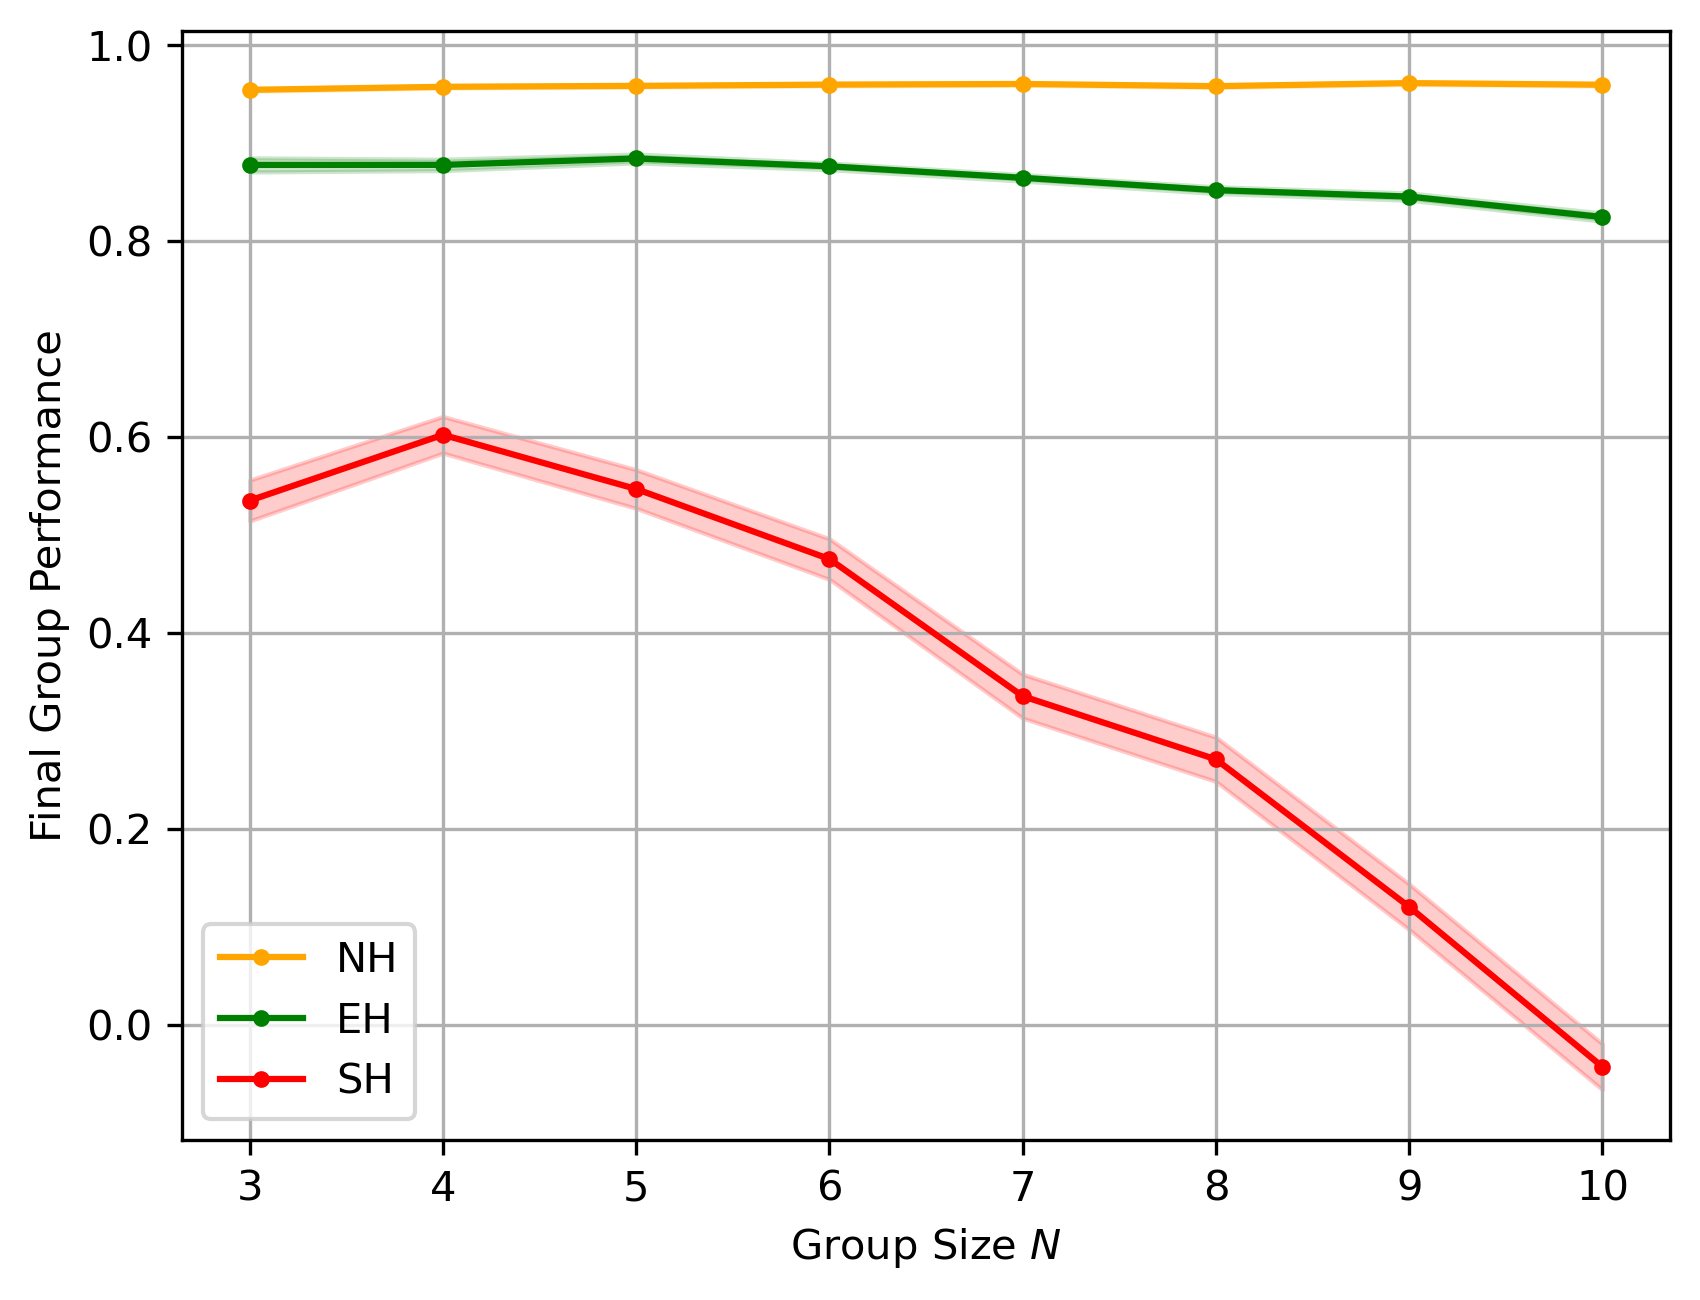

In [7]:
plt.figure(dpi=300)

plt.plot([3,4,5,6,7,8,9,10], NH_avg, color='orange', marker='.', label='NH')
plt.fill_between([3,4,5,6,7,8,9,10], NH_avg - NH_std, NH_avg + NH_std, color='orange', alpha = 0.2)

plt.plot([3,4,5,6,7,8,9,10], AR_avg, color='green', marker='.', label='EH')
plt.fill_between([3,4,5,6,7,8,9,10], AR_avg - AR_std, AR_avg + AR_std, color='green', alpha = 0.2)

plt.plot([3,4,5,6,7,8,9,10], SH_avg, color='red', marker='.', label='SH')
plt.fill_between([3,4,5,6,7,8,9,10], SH_avg - SH_std, SH_avg + SH_std, color='red', alpha = 0.2)

plt.xlabel(r'Group Size $N$')
plt.ylabel('Final Group Performance')

plt.legend()
plt.grid()